In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [8]:
def load_data():
    """Charge et prépare les données"""
    df = pd.read_csv("../data/RAW_recipes.csv")
    
    # Extraire nutrition
    df['calories'] = df['nutrition'].apply(lambda x: eval(x)[0])
    df['total_fat'] = df['nutrition'].apply(lambda x: eval(x)[1])
    df['sugar'] = df['nutrition'].apply(lambda x: eval(x)[2])
    df['protein'] = df['nutrition'].apply(lambda x: eval(x)[4])
    
    # Filtrer les outliers extrêmes pour la visualisation
    df_clean = df[
        (df['minutes'] <= 500) &
        (df['calories'] <= 2000) &
        (df['n_ingredients'] <= 50)
    ]
    
    return df_clean

In [9]:
def correlation_matrix(df):
    """Matrice de corrélation"""
    
    print("\n" + "="*60)
    print("MATRICE DE CORRÉLATION")
    print("="*60)
    
    # Sélectionner les variables numériques
    numeric_cols = ['minutes', 'n_ingredients', 'n_steps', 'calories', 
                    'total_fat', 'sugar', 'protein']
    
    # Calculer la matrice de corrélation
    corr = df[numeric_cols].corr()
    
    print("\n Corrélations les plus fortes (|r| > 0.5):")
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            r = corr.iloc[i, j]
            if abs(r) > 0.5:
                print(f"  {corr.columns[i]:15s} ↔ {corr.columns[j]:15s} : r = {r:+.3f}")
    
    # Heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1, ax=ax)
    
    ax.set_title('Matrice de corrélation des variables numériques', 
                 fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()

    plt.show()

In [10]:
def time_vs_complexity(df):
    """Relation entre temps et complexité"""
    
    print("\n" + "="*60)
    print("TEMPS vs COMPLEXITÉ")
    print("="*60)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Temps vs Nombre d'ingrédients
    axes[0].scatter(df['n_ingredients'], df['minutes'], alpha=0.1, s=10)
    axes[0].set_xlabel('Nombre d\'ingrédients', fontsize=12)
    axes[0].set_ylabel('Temps de cuisson (minutes)', fontsize=12)
    axes[0].set_title('Temps vs Nombre d\'ingrédients', fontsize=13, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Temps vs Nombre d'étapes
    axes[1].scatter(df['n_steps'], df['minutes'], alpha=0.1, s=10, color='coral')
    axes[1].set_xlabel('Nombre d\'étapes', fontsize=12)
    axes[1].set_ylabel('Temps de cuisson (minutes)', fontsize=12)
    axes[1].set_title('Temps vs Nombre d\'étapes', fontsize=13, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()

    plt.show()

In [11]:

def nutrition_relationships(df):
    """Relations entre variables nutritionnelles"""
    
    print("\n" + "="*60)
    print("RELATIONS NUTRITIONNELLES")
    print("="*60)
    
    # Pairplot des variables nutritionnelles
    nutrition_vars = ['calories', 'total_fat', 'sugar', 'protein']
    
    # Échantillonner pour la performance
    df_sample = df[nutrition_vars].sample(n=min(5000, len(df)), random_state=42)
    
    pairplot = sns.pairplot(df_sample, diag_kind='hist', plot_kws={'alpha': 0.3, 's': 10})
    pairplot.fig.suptitle('Relations entre variables nutritionnelles', 
                          y=1.02, fontsize=14, fontweight='bold')
    
    
    plt.show()

 Chargement des données...
 221,436 recettes chargées (après filtrage outliers extrêmes)


MATRICE DE CORRÉLATION

 Corrélations les plus fortes (|r| > 0.5):
  calories        ↔ total_fat       : r = +0.830
  calories        ↔ protein         : r = +0.625


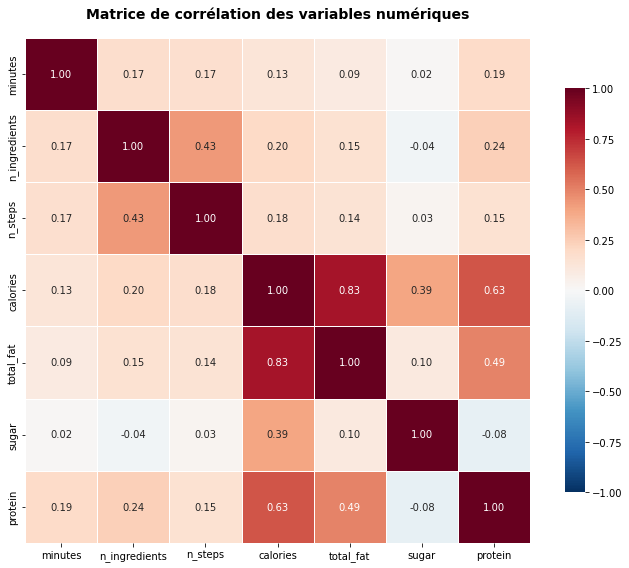


TEMPS vs COMPLEXITÉ


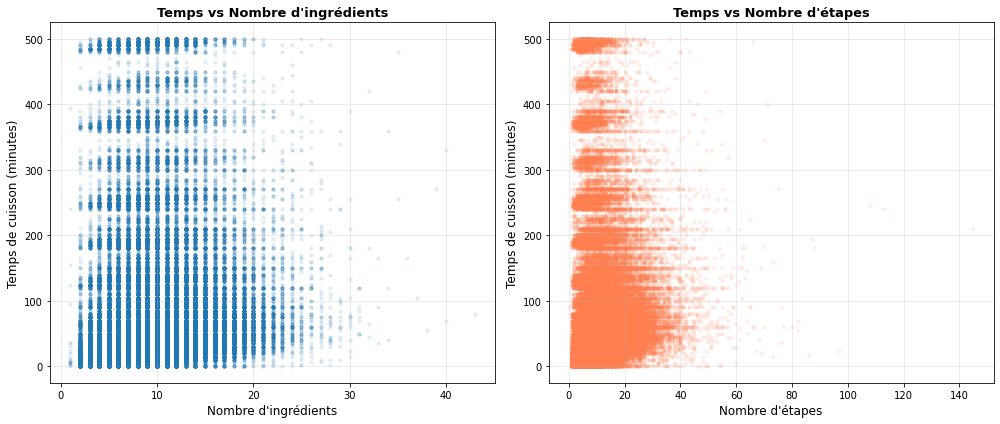


RELATIONS NUTRITIONNELLES


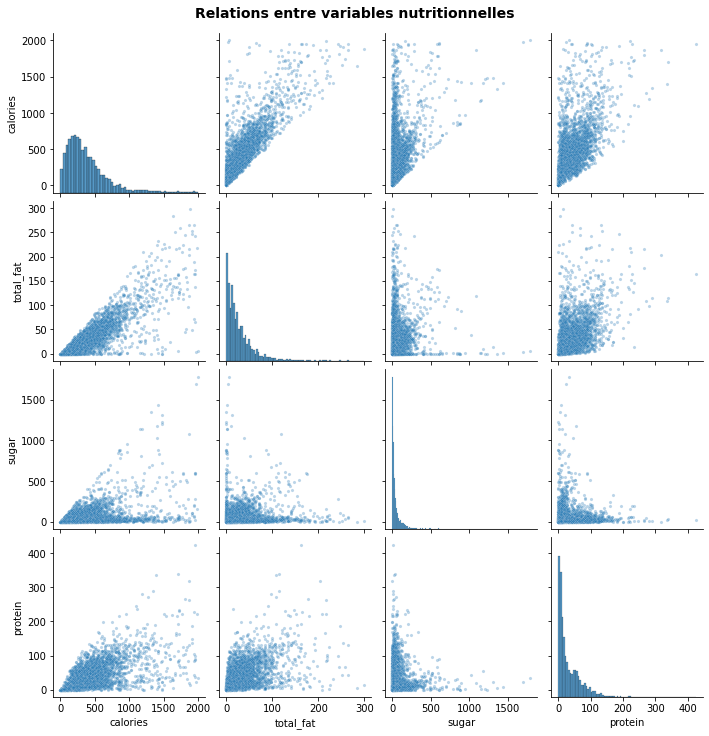

In [12]:
def main():
    """Fonction principale"""
    
    print(" Chargement des données...")
    df = load_data()
    print(f" {len(df):,} recettes chargées (après filtrage outliers extrêmes)\n")
    
    # Analyses
    correlation_matrix(df)
    time_vs_complexity(df)
    nutrition_relationships(df)
    

if __name__ == "__main__":
    main()